In [9]:
from keras.models import load_model
import cv2
from skimage import filters
from skimage import feature
import numpy as np
import matplotlib.pyplot as plt

In [10]:
best=load_model("best_result.h5")

In [32]:
image_order=4

In [33]:


test_x2=cv2.imread("MRI/"+str(image_order)+".jpeg") 
test_x=cv2.imread("CT/"+str(image_order)+".jpeg") 


#Test images
test_x = cv2.cvtColor(test_x, cv2.COLOR_BGR2GRAY)
test_x2 = cv2.cvtColor(test_x2, cv2.COLOR_BGR2GRAY)

#Feature Extraction 1
feature1_mr = filters.sobel(test_x2).reshape(-1,1)
feature1_ct=filters.sobel(test_x).reshape(-1,1)

#Feature Extraction 2
feature2_mr = feature.canny(test_x2).reshape(-1,1)
feature2_ct=feature.canny(test_x).reshape(-1,1)





test_x = test_x.reshape(-1,1)
test_x2 = test_x2.reshape(-1,1)

  



#(ct_images, mr_images,edge_sobel_mr,edge_sobel_ct)
test=np.concatenate((test_x, test_x2,feature1_mr,feature1_ct,feature2_mr,feature2_ct), axis=1)

test_result=plt.imread("RESULT/"+str(image_order)+".tif")   
test_result = cv2.cvtColor(test_result, cv2.COLOR_BGR2GRAY).reshape(-1,1)

In [34]:
y_pred=best.predict(test)
y_pred.shape

(147456, 1)

Text(0.5, 1.0, 'Virtual Result')

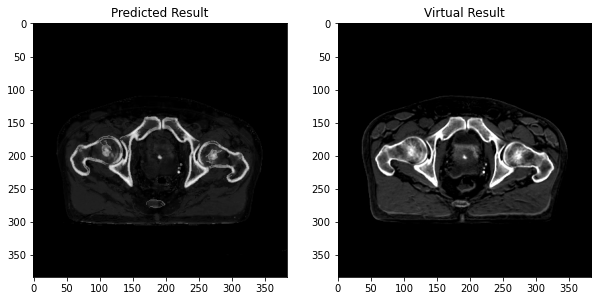

In [35]:
import math
size=int(math.sqrt(len(y_pred)))


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(10)
fig.set_figwidth(10)
ax1.imshow(y_pred.reshape(size,size),cmap="gray")
ax1.set_title("Predicted Result")
ax2.imshow(test_result.reshape(size,size),cmap="gray")
ax2.set_title("Virtual Result")